In [5]:
import pandas as pd

# Load parquet file
file_path = 'processed_dataset2.parquet'
df = pd.read_parquet(file_path, engine='pyarrow')  # or engine='fastparquet'

# View the first few rows
print(df.head())

   year                                  standardized_text
0  1920  last federal reserve board issued rules organi...
1  1920  test door service service board examine irt sa...
2  1920                        sanction chinese contracts 
3  1920  leads frazier langers margin falls north dakot...
4  1920  chicago april suspicious characters including ...


In [6]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [7]:
from joblib import Parallel, delayed
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Function for parallel processing
def analyze_sentiment_parallel(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply parallel processing
df['sentiment'] = Parallel(n_jobs=-1)(delayed(analyze_sentiment_parallel)(text) for text in df['standardized_text'])

print(df['sentiment'])


0           Positive
1           Positive
2            Neutral
3            Neutral
4           Negative
              ...   
17370908    Positive
17370909     Neutral
17370910     Neutral
17370911    Positive
17370912    Negative
Name: sentiment, Length: 17370913, dtype: object


In [13]:
# Save processed DataFrame to Parquet
df.to_parquet('sentiment_analysis.parquet', index=False)
print("Processed dataset saved successfully!")

Processed dataset saved successfully!


In [25]:
# Updated preprocessing function
def preprocess_text(text, max_len=300):
    if pd.isna(text):  # Handle NaN or empty text
        return ""
    return text[:max_len]  # Truncate text to the maximum length

# Step 1: Sample the data (including all columns)
data_sample = df.sample(n=5000, random_state=42)  # Adjust sample size as needed

# Step 2: Apply preprocessing to standardized_text column
data_sample['standardized_text'] = data_sample['standardized_text'].apply(lambda x: preprocess_text(x, max_len=300))

# Step 3: Retain all other columns (like sentiment, year)
# No need for additional processing if they are already structured

# Display the first 10 rows for verification
print(data_sample.head(10))


          year                                  standardized_text sentiment
871974    1927  schooner morrissey receives food supplies sail...  Positive
3563372   1938  tenanted repairs new housing sped indianapolis...   Neutral
11774055  1982  edwin h mosler jr former president chief execu...  Positive
11142793  1975  reprs procommunist trade unions neighborhood c...  Negative
10942590  1974  bill virdons first season manager pirates team...  Positive
4919400   1944  joan r hills nuptials wed camden c capt willia...   Neutral
746714    1926  lady howard wife sir e howard british ambassad...  Negative
3353442   1937  kings omission usual statement league basis br...  Negative
4399729   1941  rept jansept butler bros report gain net profi...  Positive
5640449   1947  comment govt suit investment bankers suit inve...  Positive


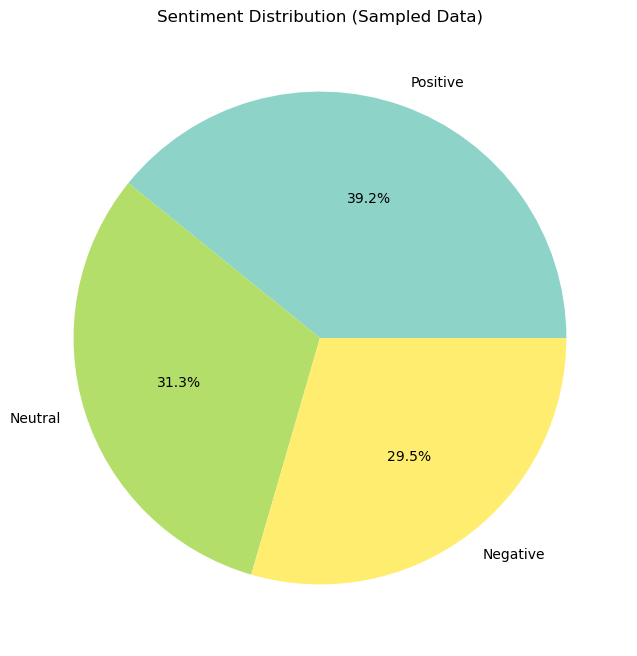

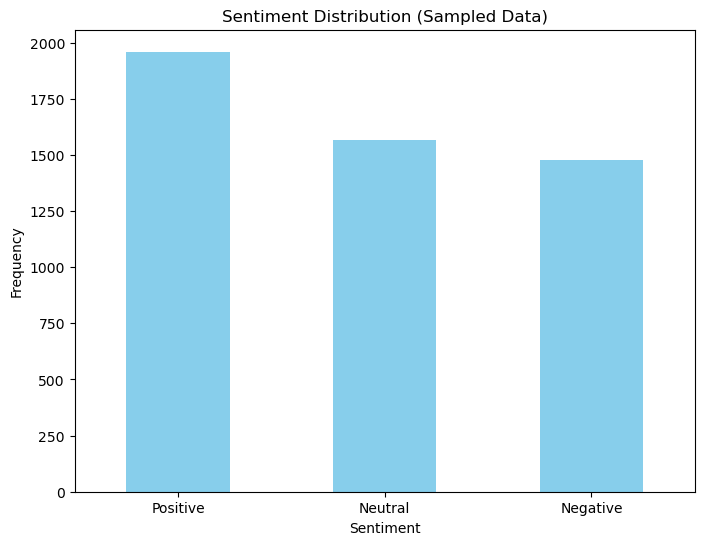

In [39]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Sentiment Distribution (Pie Chart)
sentiment_counts = data_sample['sentiment'].value_counts()

# Plot pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colormap='Set3')
plt.title("Sentiment Distribution (Sampled Data)")
plt.ylabel("")
plt.show()

# Step 3: Sentiment Distribution (Bar Chart)
sentiment_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title("Sentiment Distribution (Sampled Data)")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()






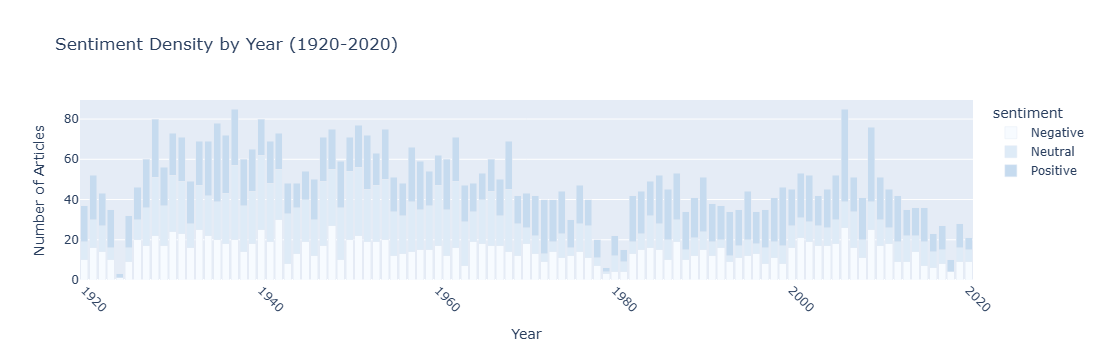

In [37]:
import plotly.express as px
import pandas as pd

# Step 6: Prepare data for the interactive bar chart (ensure year range is from 1920 to 2020)
bar_data = data_sample.groupby(['year', 'sentiment']).size().reset_index(name='count')
bar_data = bar_data[(bar_data['year'] >= 1920) & (bar_data['year'] <= 2020)]

# Create an interactive stacked bar chart
fig = px.bar(
    bar_data,
    x='year',
    y='count',
    color='sentiment',
    barmode='stack',
    title="Interactive Sentiment Density by Year (1920-2020)",
    labels={'year': 'Year', 'count': 'Number of Articles'},
    color_discrete_sequence=px.colors.sequential.Blues
)

# Update layout
fig.update_layout(
    xaxis=dict(title="Year", tickangle=45),
    yaxis=dict(title="Number of Articles"),
    title="Sentiment Density by Year (1920-2020)"
)

# Display the interactive chart
fig.show()
